# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

568

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up the url
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + weather_api_key
# test_response = requests.get(url + "&q=london&units=Imperial")
# test_json = test_response.json()
# print(json.dumps(test_json, indent=4, sort_keys=True))

# Initialize lists to hold response info for the data frame
city_name = []
country = []
lat = []
lon = []
dt = []
clouds = []
humidity = []
temp_max = []
wind_speed = []
count = 0
set_count = 0

# Loop through the list of cities and perform a request
for city in cities:
    weather_response = requests.get(url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        # Process the Records
        city_name.append(weather_json['city']['name'])
        country.append(weather_json['city']['country'])
        lat.append(weather_json['city']['coord']['lat'])
        lon.append(weather_json['city']['coord']['lon'])
        dt.append(weather_json['list'][0]['dt'])
        clouds.append(weather_json['list'][0]['clouds']['all'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        temp_max.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count += 1
        print(f"Processing record {count} of Set {set_count} | {city}")
        if (count % 50) == 0:
            set_count += 1
            count = 0
    except (KeyError, IndexError):
        # Flag an error if there is an issue processing the JSON file
        print(f"Error processing record for city {city}") 

Processing record 1 of Set 0 | kiruna
Processing record 2 of Set 0 | hermanus
Processing record 3 of Set 0 | mahebourg
Processing record 4 of Set 0 | vaini
Processing record 5 of Set 0 | rikitea
Processing record 6 of Set 0 | jamestown
Processing record 7 of Set 0 | hasaki
Processing record 8 of Set 0 | norman wells
Processing record 9 of Set 0 | oga
Processing record 10 of Set 0 | polazna
Processing record 11 of Set 0 | sao filipe
Processing record 12 of Set 0 | busselton
Processing record 13 of Set 0 | pevek
Processing record 14 of Set 0 | ancud
Processing record 15 of Set 0 | hay river
Processing record 16 of Set 0 | saldanha
Processing record 17 of Set 0 | talnakh
Processing record 18 of Set 0 | punta arenas
Processing record 19 of Set 0 | thompson
Processing record 20 of Set 0 | dikson
Processing record 21 of Set 0 | mataura
Processing record 22 of Set 0 | barrow
Processing record 23 of Set 0 | cam ranh
Processing record 24 of Set 0 | mount isa
Processing record 25 of Set 0 | hilo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_data_df = pd.DataFrame({
                            "City": city_name,
                            "Lat": lat,
                            "Lng": lon,
                            "Max Temp": temp_max,
                            "Humidity": humidity,
                            "Cloudiness": clouds,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": dt
                         })
city_data_df.index.name = "City_ID"
city_data_df.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tasiilaq,65.6145,-37.6368,26.91,67,0,8.01,GL,1604350800
1,Am Timan,11.0297,20.2827,81.81,34,29,2.55,TD,1604350800
2,Evensk,61.9500,159.2333,25.47,97,99,5.46,RU,1604350800
3,Wollongong,-34.4333,150.8833,61.52,80,24,1.79,AU,1604350800
4,Punta Arenas,-53.1500,-70.9167,56.21,56,87,2.42,CL,1604350800


In [20]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.593301,15.318738,59.037664,69.959292,52.238938,8.630938,1.604351e+09
std,32.819979,91.116933,22.545051,20.375294,37.230563,6.211446,0.000000e+00
min,-54.800000,-175.200000,-15.380000,12.000000,0.000000,0.040000,1.604351e+09
25%,-6.216700,-62.652800,46.940000,58.000000,11.000000,4.250000,1.604351e+09
50%,26.154700,17.944200,65.030000,75.000000,56.000000,7.140000,1.604351e+09
75%,47.674000,92.750000,76.770000,85.000000,88.000000,11.430000,1.604351e+09
max,78.218600,179.316700,95.670000,99.000000,100.000000,37.870000,1.604351e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# Check if there are cities with humidity > 100%
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.593301,15.318738,59.037664,69.959292,52.238938,8.630938,1.604351e+09
std,32.819979,91.116933,22.545051,20.375294,37.230563,6.211446,0.000000e+00
min,-54.800000,-175.200000,-15.380000,12.000000,0.000000,0.040000,1.604351e+09
25%,-6.216700,-62.652800,46.940000,58.000000,11.000000,4.250000,1.604351e+09
50%,26.154700,17.944200,65.030000,75.000000,56.000000,7.140000,1.604351e+09
75%,47.674000,92.750000,76.770000,85.000000,88.000000,11.430000,1.604351e+09
max,78.218600,179.316700,95.670000,99.000000,100.000000,37.870000,1.604351e+09


In [24]:
#  Get the indices of cities that have humidity over 100%; there aren't any, but this is how it would be done
humidity_gt_100_index = city_data_df.index[city_data_df["Humidity"] > 100 ]
humidity_gt_100_index

Int64Index([], dtype='int64', name='City_ID')

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(humidity_gt_100_index, inplace=False)
clean_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tasiilaq,65.6145,-37.6368,26.91,67,0,8.01,GL,1604350800
1,Am Timan,11.0297,20.2827,81.81,34,29,2.55,TD,1604350800
2,Evensk,61.9500,159.2333,25.47,97,99,5.46,RU,1604350800
3,Wollongong,-34.4333,150.8833,61.52,80,24,1.79,AU,1604350800
4,Punta Arenas,-53.1500,-70.9167,56.21,56,87,2.42,CL,1604350800


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Observation: What this is showing is to be expected, as we get closer to the equator, temperatures go up. Another thing that is implied in the data is there are fewer northern cities. From the plot we see many fewer dots as we go north or south from the equator.

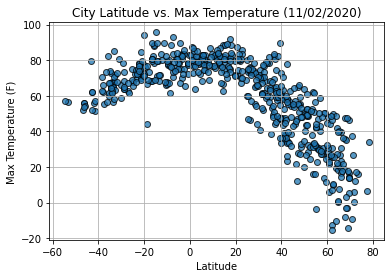

In [43]:
date_secs = clean_city_data_df.iloc[0,8]
date_text_full = str(pd.to_datetime(date_secs, unit='s'))
time_list = date_text_full.split(" ")
# print(time_list[0])
date_list = time_list[0].split("-")
my_date = f"({date_list[1]}/{date_list[2]}/{date_list[0]})"
# print(my_date)

x_axis = clean_city_data_df["Lat"]
y_axis = clean_city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Max Temperature {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatvMaxTemp_pyplot.png")
plt.show()

## Latitude vs. Humidity Plot
  
Observation: This is another expected result. The plot shows a notch of overall higher humidity near the equator. The southern hemisphere shows a more even distribution of humidity as we get farther away from the equator versus the northern hemisphere; although it still tends to have more points in the higher humidity range. The northern hemisphere is showing a cluster of high humidity from 40-70 Latitude. This cluster could be due to coastal cities being selected.

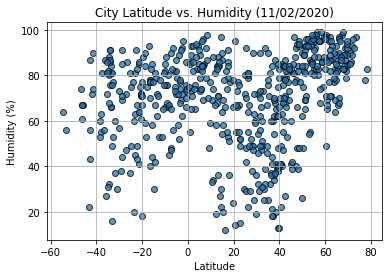

In [44]:
y_axis = clean_city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Humidity {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatvHumidity_pyplot.png")
plt.show()

## Latitude vs. Cloudiness Plot
  
Observation: What this plot shows is there is no clear correlation between Latitude and Cloudiness. Again there is cluster in the northern hemisphere where it is more cloudy. This cluster could be due to the phenonmenon noted above where these may be coastal cities.

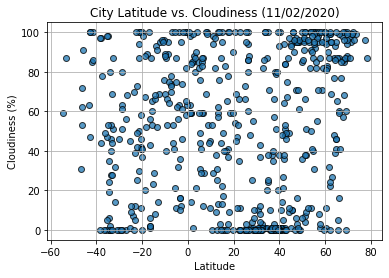

In [45]:
y_axis = clean_city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Cloudiness {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatvCloudiness_pyplot.png")
plt.show()

## Latitude vs. Wind Speed Plot
  
Observation: The plots shows there is very little correlation between latitude and wind speed. We see a fairly even distribution band below 25mph, with a few outliers.

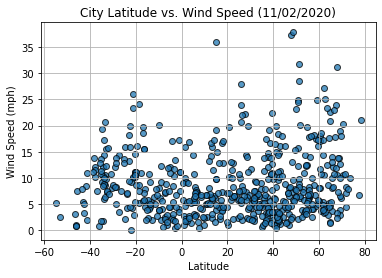

In [46]:
y_axis = clean_city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid()
# plt.xlim((15, 25))
# plt.ylim((34, 46))
plt.title(f"City Latitude vs. Wind Speed {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/LatvWindSpeed_pyplot.png")
plt.show()

## Linear Regression

In [48]:
# Define a function for the Linear Regression steps since we do this a number of times
def plot_linear_regression(x_axis, y_axis, x_label, y_label, coords, filename ):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-value is: {rvalue}")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regress_values = x_axis * slope + intercept
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq, coords, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(filename)
    plt.show()

# Create Northern and Southern Hemispere DataFrames since the next few steps only plot one or the other
northern_df = clean_city_data_df.loc[clean_city_data_df["Lat"] >= 0, :]
southern_df = clean_city_data_df.loc[clean_city_data_df["Lat"] < 0, :]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tasiilaq,65.6145,-37.6368,26.91,67,0,8.01,GL,1604350800
1,Am Timan,11.0297,20.2827,81.81,34,29,2.55,TD,1604350800
2,Evensk,61.9500,159.2333,25.47,97,99,5.46,RU,1604350800
5,Ereymentau,51.6199,73.1033,28.65,96,38,6.08,KZ,1604350800
7,Cherskiy,68.7500,161.3000,-3.15,92,100,13.78,RU,1604350800


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
  

The r-value is: -0.8442484589106958


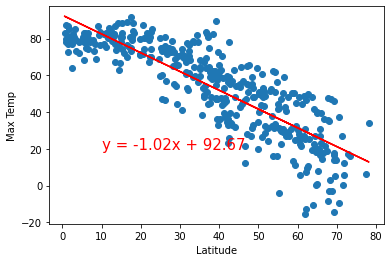

In [63]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Max Temp"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Max Temp", (10, 20), "../Images/NortherLatvTemp_pyplot.png" )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6422960959621461


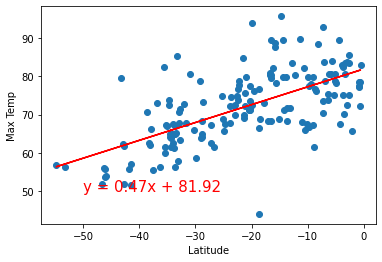

In [54]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Max Temp"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Max Temp", (-50, 50), "../Images/SoutherLatvTemp_pyplot.png" )

Observation: In the Northern Hemisphere, the absolute value of the r-value is 0.84; this is fairly close to 1. This means there is a fairly strong correlation between latitude and max temperature. In this case it is a negative correlation as the temperature goes down as we travel further north. For the Southern Hemisphere, the r-value is 0.64. This means there is less correlation between latitude and max temperature than in the Northern Hemisphere; this is born out in the plot shows the points being further away from the regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27903836661344544


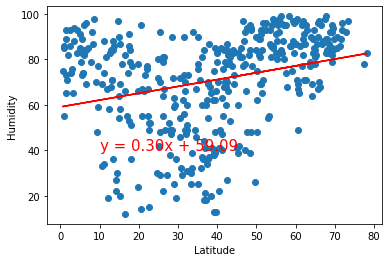

In [55]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Humidity"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Humidity", (10, 40), "../Images/NortherLatvHumidity_pyplot.png" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17936082312101362


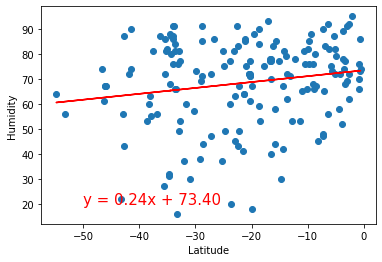

In [56]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Humidity"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Humidity", (-50, 20), "../Images/SoutherLatvHumidity_pyplot.png" )

Observation: Both the Northern and Southern Hemispheres have low r-values indicating that there is little correlation between humidity and latitude. This is shown in the plots where there are many dots that are distant from the regression line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19840410857793414


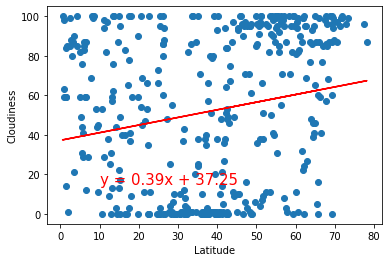

In [58]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Cloudiness"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Cloudiness", (10, 15), "../Images/NortherLatvCloudiness_pyplot.png" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16246367103752973


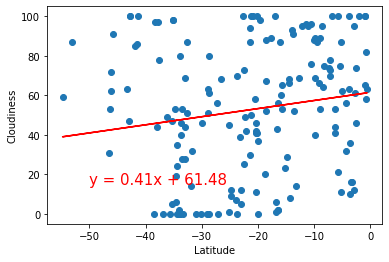

In [59]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Cloudiness"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Cloudiness", (-50, 15), "../Images/SoutherLatvCloudiness_pyplot.png" )

Observation: As with humidity, the cloudiness r-values are small and the plot points are fairly evenly distributed in the plot area. This indicates there is only weak correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21079844544321488


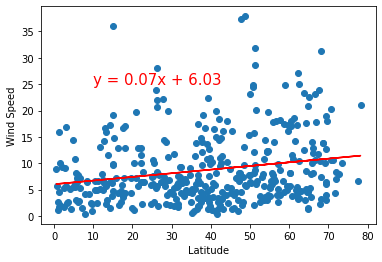

In [60]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Wind Speed"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Wind Speed", (10, 25), "../Images/NortherLatvWind Speed_pyplot.png" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09835446734451193


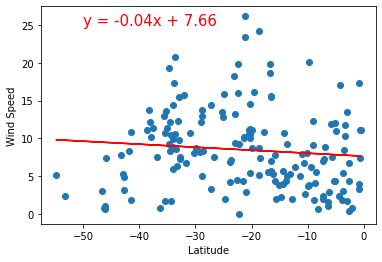

In [62]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Wind Speed"]
plot_linear_regression(x_axis, y_axis, "Latitude", "Wind Speed", (-50, 25), "../Images/SoutherLatvWind Speed_pyplot.png" )

Observation: the absolute value of the r-values are 0.21 for the Northern Hemisphere and 0.10 for the Southern Hemisphere. This indicates only a weak link between wind speed and latitude. This weak link is shown in the plots with the plot points being loosely scattered around the regression line.